### 1. Data

이번 과제는 MNIST와 FMNIST 데이터를 사용합니다. 그렇지만 다양한 종류의 데이터에 적용할 수 있는 범용적인 코드를 작성하여, 2개의 데이터 셋에 대해 코드의 큰 변형 없이 적용하는 것을 목표로 합니다. 각 데이터 셋에 대해 다르게 나타나게 될 최적의 hyperparameter setting을 찾아보세요.

### 2. Model Structure

기본적인 MLP 구조에서 여러분은 hidden layer를 몇 층 쌓을지, 각 layer의 width, activation function과 dropout, batch normalization의 적용 여부를 결정해야 합니다. 주어진 데이터에 대해 최대의 성능을 내는 어떤 설정이 존재하기는 하겠지만, 이걸 한 번에 찾는 건 매우 어려운 일 입니다. 심지어 모델 초기화 등에 randomness가 존재하기 때문에 매번 미세하게 달라질 것 입니다. 이러한 randomness까지는 고려하지 않더라도 모델 구조와 다른 세팅을 바꿔가며 각 데이터셋에 대해 학습을 진행하여 test dataset에 대한 성능을 확인해 보시기 바랍니다.

### 3. Optimization Procedure

실습에서 확인하셨겠지만 모델 구조 외에도 어떠한 optimizer와 learning rate을 사용하는가는 성능에 굉장히 큰 영향을 줍니다. 많이 사용되는 SGD와 Adam optimizer 외에도 다른 알고리즘들을 적용해 보시기 바랍니다. optimizer의 종류 외에도 각 optimizer의 hyperparameter도 있지만, 이것까지는 tuning을 하지 않아도 됩니다. (이러한 hyperparameter들은 일반적으로 고정 시켜서 사용하는 트렌드입니다.)

### 4. 평가

지금까지 언급한 경우만 고려하더라도 데이터 종류, 모델 종류, optimizer 종류, lr 까지 하여 tuning할 요소가 4가지나 됩니다. 4종류의 모델, 3종류의 optimizer와 lr을 3가지 확인한다고 하면 총 72번의 실험이 필요하게 됩니다. 그렇게 때문에 이렇게 많은 실험들을 효과적으로 실행하는 것도 AI 엔지니어에게는 굉장히 중요한 요소입니다.

이번 과제에서는 for 문을 이용해 여러 번의 실험을 진행한 후 최적의 세팅을 찾아 학습을 한 번 더 진행해보시기 바랍니다. 최근에는 다양한 hyperparameter에 대한 search를 자동으로 해주는 tool들이 개발되어 있으니 관심 있으신 분들은 찾아보셔도 좋을 것 같습니다. 이번 과제에서는 필요하지 않습니다! 이번 과제에서는 성능 이외에도 충분히 많은 모델 구조를 비교하셨는지, optimizer의 종류, lr의 종류, dropout이나 batch norm 등의 적용 여부를 평가합니다.

자세한 평가 기준은 다음과 같습니다.

- Train-valid split에 randomness 적용
- 3가지 이상의 모델 구조 사용
    - 기본적으로 제공되는 base model 이외에 2개 이상을 더 확인해 주세요!
- dropout을 사용하는 모델 포함
- Batch normalization을 사용하는 모델 포함.
- 3가지 이상의 optimizer 사용
    - 기본으로 제공된 sgd, adam 이외에 1가지 이상의 optimizer를 확인해 주세요!
- 2가지 이상의 lr 적용
    - 각 optimizer 별로 최적의 lr는 다를 수 있습니다. torch에서 제공하는 default learning rate이 그 값이라고 볼 수 있는데, task별로 거기에서 tuning이 필요하겠죠. search를 위한 for 문을 약간 변형하면 optimizer 별로 다른 lr을 확인해 보실 수 있습니다.
- MNIST dataset에 대해 acc 98.5% 달성.
- FMNIST dataset에 대해 acc 90.5% 달성.

## 사용해볼 optimizer
- adam, adagrad 사용
- layer 추가
- bachnorm, drop out, 동시

# 라이브러리 설치 및 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

from tqdm import tqdm

import numpy as np

In [ ]:
root = os.path.join('/content/drive/MyDrive/Colab Notebooks/멋사쏘카2기/Assignment')

In [ ]:
mnist_train = datasets.MNIST(
    root=root,
    train=True,
    download=True,
    transform = transforms.ToTensor()
)

mnist_test = datasets.MNIST(
    root=root,
    train=False,
    download=True,
    transform=transforms.ToTensor()   
)

In [ ]:
fmnist_train = datasets.FashionMNIST(
    root=root, 
    train=True, 
    download=True, 
    transform=transforms.ToTensor()
)
fmnist_test = datasets.FashionMNIST(
    root=root, 
    train=False, 
    download=True, 
    transform=transforms.ToTensor()
)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Train Test split

In [ ]:
class mnist_dataset(Dataset):
  def __init__(self, data, targets, transform=None, target_transform=None):
    super().__init__()

    self.data = data
    self.targets = targets
    self.transform = transform
    self.target_transform = target_transform
    pass

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    x, y = self.data[idx], self.targets[idx]

    if self.transform:
      x = self.transform(x)
    if self.target_transform:
      y = self.target_transform(y)

    return x, y

In [ ]:
def shuffle(dataset, seed=29):
  data = dataset.data
  target = dataset.targets
  np.random.seed(seed=seed)
  p = np.random.permutation(len(target))

  return mnist_dataset(data[p], target[p], dataset.transform, dataset.target_transform)


In [ ]:
def split_train_valid(dataset, valid_ratio=0.1):
  dataset = shuffle(dataset)

  n_valid = int(len(dataset)*valid_ratio)   #90%는 train, 10%는 valid

  train_data = dataset.data[:-n_valid].numpy()
  valid_data = dataset.data[-n_valid:].numpy()

  train_targets = dataset.targets[:-n_valid]
  valid_targets = dataset.targets[-n_valid:]

  train = mnist_dataset(data=train_data, targets=train_targets, transform=dataset.transform, target_transform=dataset.target_transform)
  valid = mnist_dataset(data=valid_data, targets=valid_targets, transform=dataset.transform, target_transform=dataset.target_transform)

  return train, valid

In [ ]:
mnist_train, mnist_valid = split_train_valid(dataset=mnist_train)
fmnist_train, fmnist_valid = split_train_valid(dataset=fmnist_train)

In [ ]:
mnists = {}
mnists["mnist"] = {"train": mnist_train, "valid": mnist_valid, "test": mnist_test}
mnists["fmnist"] = {"train": fmnist_train, "valid": fmnist_valid, "test": fmnist_test}

In [ ]:
loaders = {}
for k in mnists.keys():
  loaders[k] = {s: DataLoader(dataset=mnists[k][s], batch_size= 64, shuffle= s == "train", drop_last=True) for s in ["train", "valid", "test"]}

# Model 생성
- dropout은 0.3사용
- Layer의 크기 조정


In [ ]:
# 1. layer 깊이 추가, batchnorm만 적용
class mymodel1(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.model = nn.Sequential(
        nn.Flatten(),

        nn.Linear(28*28, 256),
        nn.BatchNorm1d(256),
        nn.ReLU(),

        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),

        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),

        nn.Linear(64, n_class)
    )

  def forward(self,x):
    return self.model(x)




# 2. layer 깊이 추가, batchnorm, dropout(0.3) 적용
class mymodel2(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.model = nn.Sequential(
        nn.Flatten(),

        nn.Linear(28*28, 256),
        nn.BatchNorm1d(256),
        nn.Dropout(p=0.3),
        nn.ReLU(),

        nn.Linear(256, 128),
        nn.BatchNorm1d(128),
        nn.Dropout(p=0.3),
        nn.ReLU(),

        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.Dropout(p=0.3),
        nn.ReLU(),

        nn.Linear(64, n_class)
    )

  def forward(self,x):
    return self.model(x)




# 3. layer 깊이, 넓이 추가, batch norm, dropout(0.3) 추가
class mymodel3(nn.Module):
  def __init__(self, n_class=10):
    super().__init__()

    self.model = nn.Sequential(
        nn.Flatten(),

        nn.Linear(28*28, 512),
        nn.BatchNorm1d(512),
        nn.Dropout(p=0.2),
        nn.ReLU(),

        nn.Linear(512, 256),
        nn.BatchNorm1d(256),
        nn.Dropout(p=0.2),
        nn.ReLU(),

        nn.Linear(256,128),
        nn.BatchNorm1d(128),
        nn.Dropout(p=0.2),
        nn.ReLU(),
        
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.Dropout(p=0.2),
        nn.ReLU(),

        nn.Linear(64,32),
        nn.BatchNorm1d(32),
        nn.Dropout(p=0.2),
        nn.ReLU(),

        nn.Linear(32,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),

        nn.Linear(16, n_class)
    )

  def forward(self,x):
    return self.model(x)

# Trainer
- optimizer 추가 (AdaGrad, RMSprop)

In [ ]:
class Trainer(nn.Module):
  def __init__(self, model_class, loaders, n_class=10, opt="sgd", lr=0.001, has_scheduler=False, device="cpu"):
    super().__init__()

    self.model = model_class(n_class=n_class)
    self.loss = nn.CrossEntropyLoss()
    
    self.train_loader = loaders["train"]
    self.valid_loader = loaders["valid"]
    self.test_loader = loaders["test"]

    self._get_optimizer(opt=opt.lower(), lr=lr)
    self.has_scheduler = has_scheduler
    if self.has_scheduler:
      self._get_scheduler()

    self.device = device
    pass


  def _get_optimizer(self, opt, lr=0.001):
    if opt == "sgd":
      self.optimizer = torch.optim.SGD(params=self.model.parameters(), lr=lr)
    elif opt == "adam":
      self.optimizer = torch.optim.Adam(params=self.model.parameters(), lr=lr)
    elif opt == 'adagrad':
      self.optimizer = torch.optim.Adagrad(params=self.model.parameters(), lr=lr)
    elif opt == 'rmsprop':
      self.optimizer = torch.optim.RMSprop(params=self.model.parameters(), lr=lr)

    else:
      raise ValueError(f"optimizer {opt} is not supproted")


  def _get_scheduler(self):
    self.scheduler = torch.optim.lr_scheduler.StepLR(optimizer=self.optimizer, step_size=5, gamma=0.5, verbose=0)


  def train(self, max_epochs=10):
    print("===== Train Start =====")
    history = {"train_loss": [], "train_acc": [], "valid_loss": [], "valid_acc": []}
    for e in range(max_epochs):
      train_loss, train_acc = self._train_epoch()
      valid_loss, valid_acc = self._valid_epoch()

      history["train_loss"].append(train_loss)
      history["train_acc"].append(train_acc)
      history["valid_loss"].append(valid_loss)
      history["valid_acc"].append(valid_acc)

      if self.has_scheduler:
        self.scheduler.step()

      if e % 10 == 0:
        print(f"Epoch: {e}, train loss: {train_loss:>6f}, train acc: {train_acc:>3f}, valid loss: {valid_loss:>6f}, valid acc: {valid_acc:>3f}")

    self.plot_history(history)


  def _train_epoch(self):
    epoch_loss, epoch_acc = 0, 0
    self.model.train()
    for (x, y) in self.train_loader:
      x = x.to(self.device)
      y = y.to(self.device)

      y_hat = self.model(x)
      loss = self.loss(y_hat, y)

      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

      epoch_loss += loss.to("cpu").item()
      epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    epoch_loss /= len(self.train_loader)
    epoch_acc /= len(self.train_loader)

    return epoch_loss, epoch_acc
  

  def _valid_epoch(self):
    epoch_loss, epoch_acc = 0, 0
    self.model.eval()
    with torch.no_grad():
      for (x, y) in self.valid_loader:
        x = x.to(self.device)
        y = y.to(self.device)

        y_hat = self.model(x)
        loss = self.loss(y_hat, y)

        epoch_loss += loss.to("cpu").item()
        epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    epoch_loss /= len(self.valid_loader)
    epoch_acc /= len(self.valid_loader)

    return epoch_loss, epoch_acc


  def plot_history(self, history):
    fig = plt.figure(figsize=(12, 6))

    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history["train_loss"], color="red", label="train loss")
    ax.plot(history["valid_loss"], color="blue", label="valid loss")
    ax.set_title("Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history["train_acc"], color="red", label="train acc")
    ax.plot(history["valid_acc"], color="blue", label="valid acc")
    ax.set_title("Acc")
    ax.legend()

    fig.show()


  def test(self):
    print("===== Test Start =====")
    epoch_loss, epoch_acc = 0, 0
    self.model.eval()
    with torch.no_grad():
      for (x, y) in self.test_loader:
        x = x.to(self.device)
        y = y.to(self.device)

        y_hat = self.model(x)
        loss = self.loss(y_hat, y)

        epoch_loss += loss.to("cpu").item()
        epoch_acc += (y_hat.argmax(1) == y).type(torch.float).to("cpu").mean().item()

    epoch_loss /= len(self.test_loader)
    epoch_acc /= len(self.test_loader)

    print(f"Test loss: {epoch_loss:>6f}, Test acc: {epoch_acc:>3f} \n")

# Train

In [ ]:
model = [mymodel1, mymodel2, mymodel3]

opti = ['adam', 'adagrad', 'rmsprop']
lr = [0.01, 0.005, 0.001]

data = {"mnist": 10, "fmnist": 10}

## MNIST 

  0%|          | 0/3 [00:00<?, ?it/s]

Start training with model <class '__main__.mymodel1'> with adam optimizer, learning rate starting from 0.01
===== Train Start =====
Epoch: 0, train loss: 0.226961, train acc: 0.930420, valid loss: 0.118243, valid acc: 0.964214
Epoch: 10, train loss: 0.010009, train acc: 0.996497, valid loss: 0.074843, valid acc: 0.982359
Epoch: 20, train loss: 0.002050, train acc: 0.999333, valid loss: 0.092269, valid acc: 0.983703
===== Test Start =====
Test loss: 0.078414, Test acc: 0.984976 

Start training with model <class '__main__.mymodel1'> with adam optimizer, learning rate starting from 0.005
===== Train Start =====
Epoch: 0, train loss: 0.219690, train acc: 0.933645, valid loss: 0.128091, valid acc: 0.959845
Epoch: 10, train loss: 0.007825, train acc: 0.997572, valid loss: 0.074708, valid acc: 0.982359
Epoch: 20, train loss: 0.001244, train acc: 0.999629, valid loss: 0.082401, valid acc: 0.984375
===== Test Start =====
Test loss: 0.070181, Test acc: 0.986478 

Start training with model <clas

 33%|███▎      | 1/3 [17:31<35:03, 1051.91s/it]

Test loss: 0.069967, Test acc: 0.984776 

Start training with model <class '__main__.mymodel2'> with adam optimizer, learning rate starting from 0.01
===== Train Start =====
Epoch: 0, train loss: 0.341104, train acc: 0.899689, valid loss: 0.143277, valid acc: 0.958165
Epoch: 10, train loss: 0.067148, train acc: 0.980223, valid loss: 0.065790, valid acc: 0.980679
Epoch: 20, train loss: 0.036980, train acc: 0.988508, valid loss: 0.071473, valid acc: 0.980679
===== Test Start =====
Test loss: 0.056301, Test acc: 0.985577 

Start training with model <class '__main__.mymodel2'> with adam optimizer, learning rate starting from 0.005
===== Train Start =====
Epoch: 0, train loss: 0.338897, train acc: 0.901171, valid loss: 0.131183, valid acc: 0.960685
Epoch: 10, train loss: 0.062195, train acc: 0.981298, valid loss: 0.067857, valid acc: 0.981687
Epoch: 20, train loss: 0.034070, train acc: 0.989398, valid loss: 0.064298, valid acc: 0.982527
===== Test Start =====
Test loss: 0.055629, Test acc: 

 67%|██████▋   | 2/3 [35:32<17:48, 1068.52s/it]

Test loss: 0.055290, Test acc: 0.984876 

Start training with model <class '__main__.mymodel3'> with adam optimizer, learning rate starting from 0.01
===== Train Start =====
Epoch: 0, train loss: 0.449634, train acc: 0.877335, valid loss: 0.195605, valid acc: 0.946237
Epoch: 10, train loss: 0.052112, train acc: 0.985969, valid loss: 0.070842, valid acc: 0.982023
Epoch: 20, train loss: 0.017913, train acc: 0.995070, valid loss: 0.073763, valid acc: 0.984879
===== Test Start =====
Test loss: 0.064147, Test acc: 0.986979 

Start training with model <class '__main__.mymodel3'> with adam optimizer, learning rate starting from 0.005
===== Train Start =====
Epoch: 0, train loss: 0.447161, train acc: 0.882673, valid loss: 0.159492, valid acc: 0.958333
Epoch: 10, train loss: 0.045870, train acc: 0.987619, valid loss: 0.068194, valid acc: 0.984207
Epoch: 20, train loss: 0.018184, train acc: 0.995329, valid loss: 0.069827, valid acc: 0.984375
===== Test Start =====
Test loss: 0.058997, Test acc: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


===== Test Start =====
Test loss: 0.059900, Test acc: 0.986178 

Start training with model <class '__main__.mymodel3'> with adagrad optimizer, learning rate starting from 0.01
===== Train Start =====
Epoch: 0, train loss: 0.533924, train acc: 0.889476, valid loss: 0.172807, valid acc: 0.962030
Epoch: 10, train loss: 0.088704, train acc: 0.980149, valid loss: 0.081401, valid acc: 0.979335
Epoch: 20, train loss: 0.071850, train acc: 0.983170, valid loss: 0.077997, valid acc: 0.981183
===== Test Start =====
Test loss: 0.065150, Test acc: 0.983774 

Start training with model <class '__main__.mymodel3'> with adagrad optimizer, learning rate starting from 0.005
===== Train Start =====
Epoch: 0, train loss: 0.839211, train acc: 0.838783, valid loss: 0.328131, valid acc: 0.957661
Epoch: 10, train loss: 0.123371, train acc: 0.974681, valid loss: 0.094239, valid acc: 0.978831
Epoch: 20, train loss: 0.103912, train acc: 0.978518, valid loss: 0.089515, valid acc: 0.978831
===== Test Start =====
Te

100%|██████████| 3/3 [59:31<00:00, 1190.52s/it]

Test loss: 0.057266, Test acc: 0.986178 



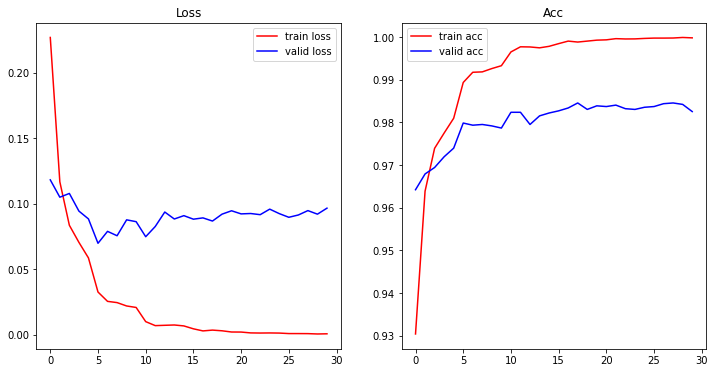

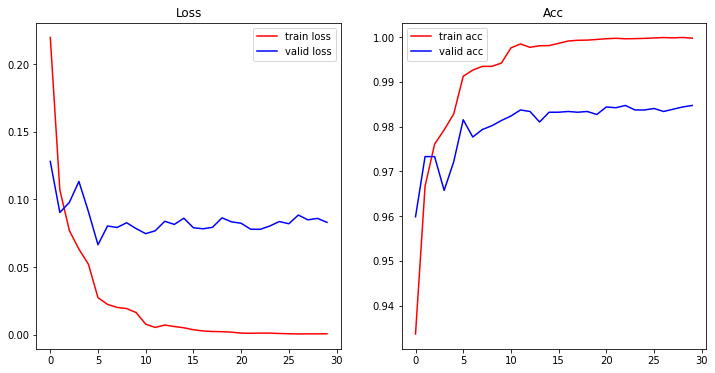

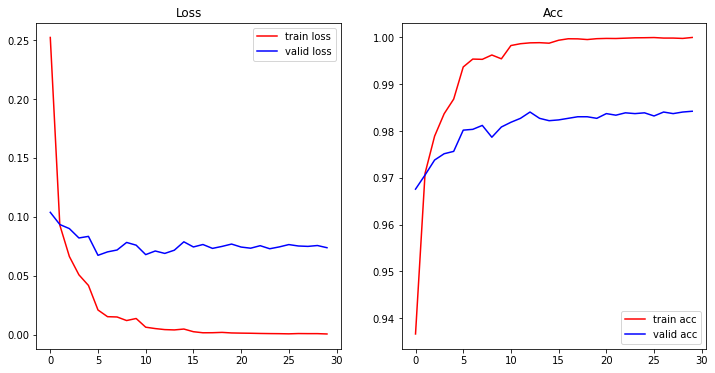

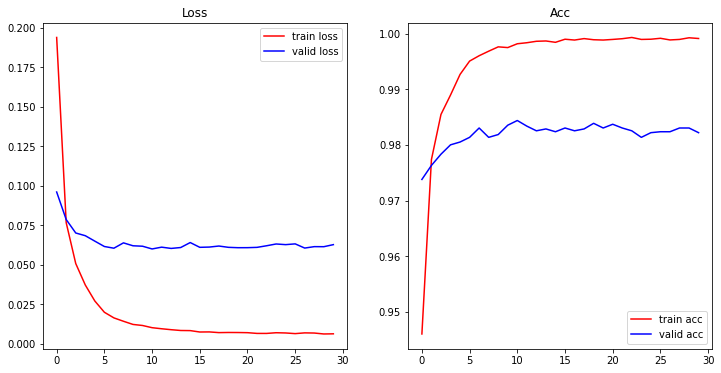

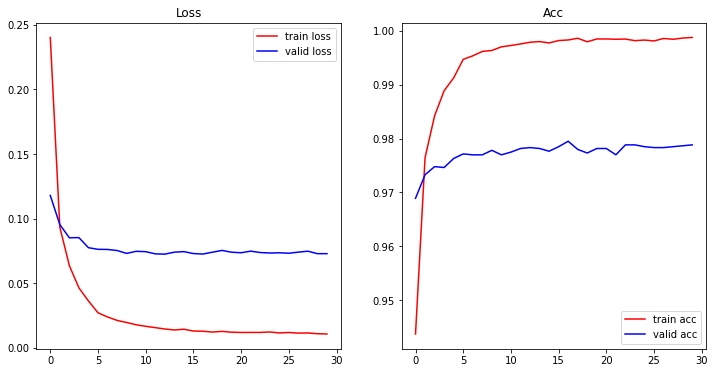

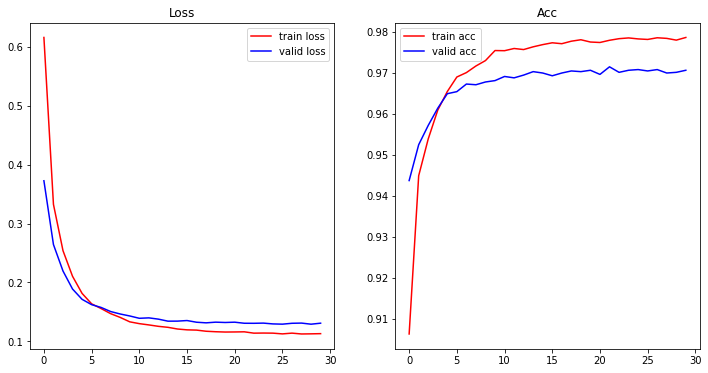

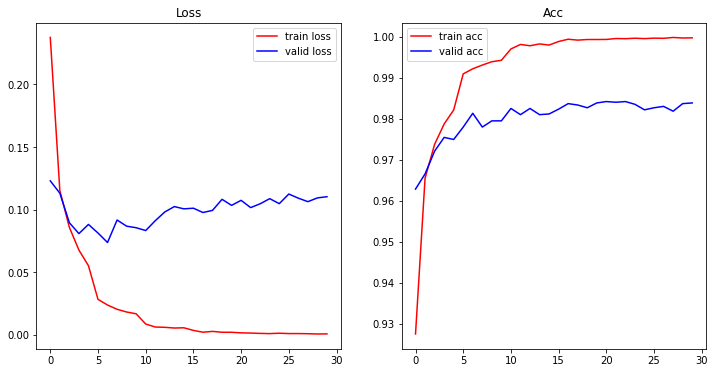

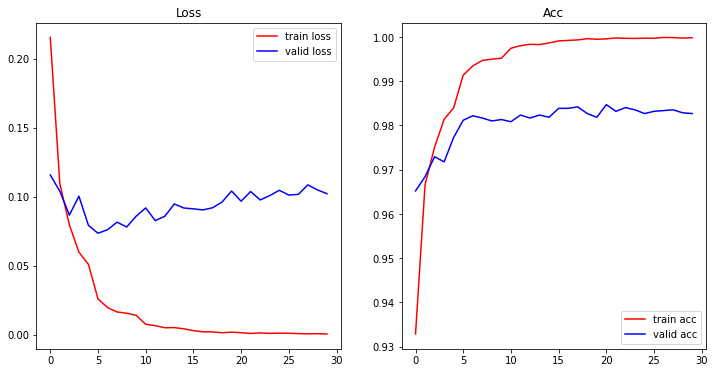

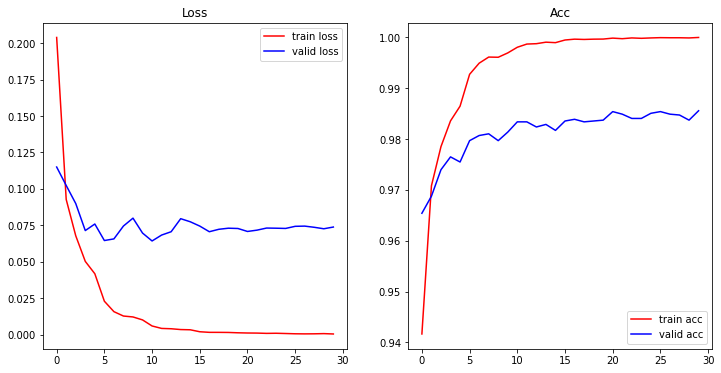

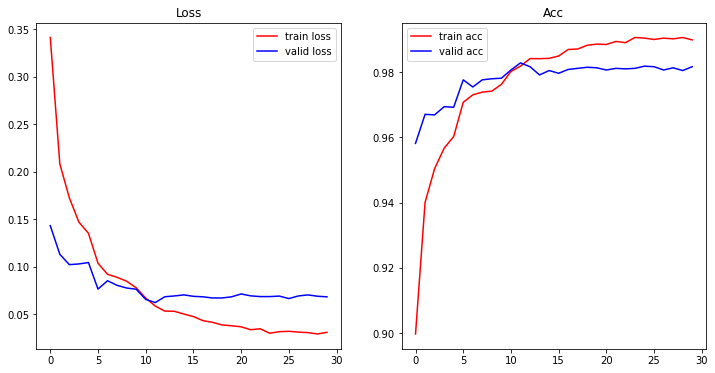

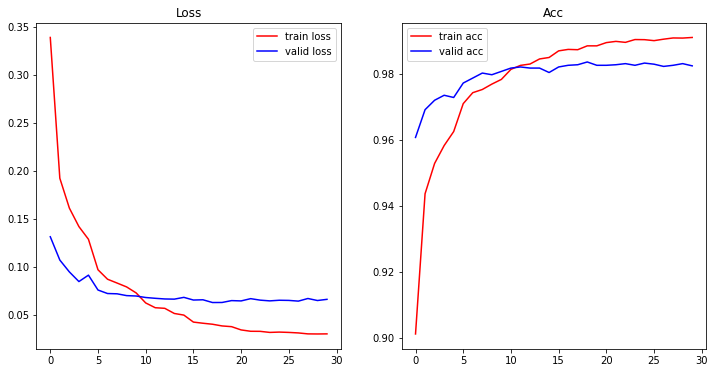

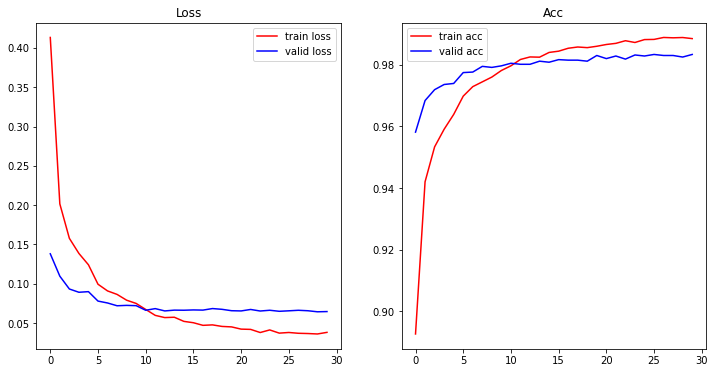

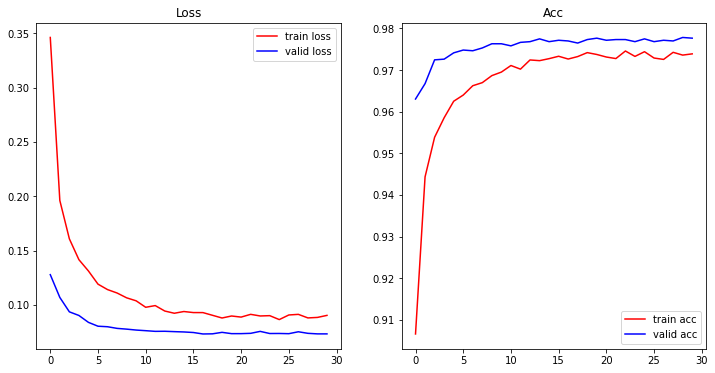

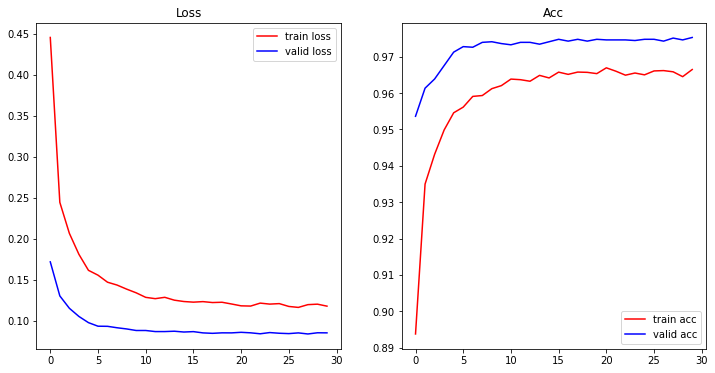

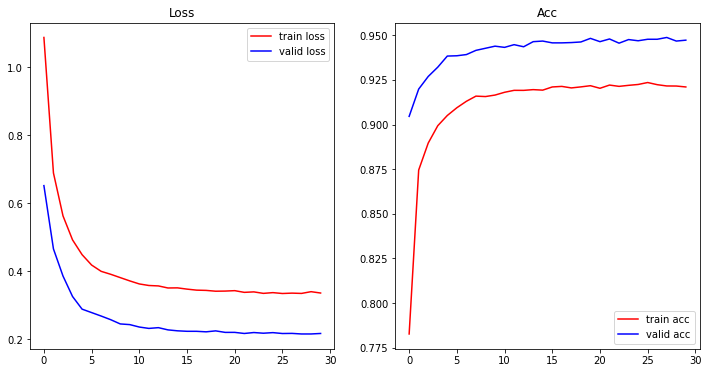

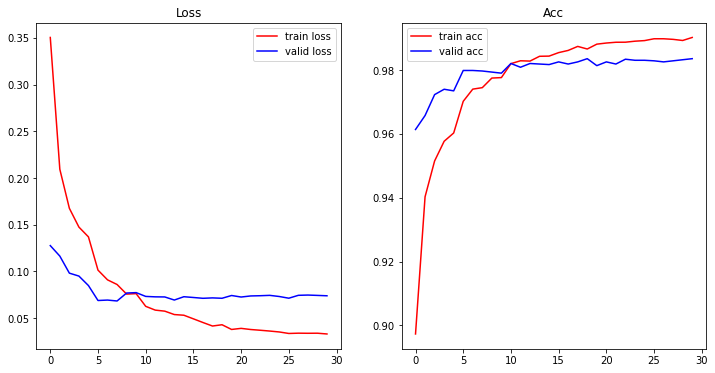

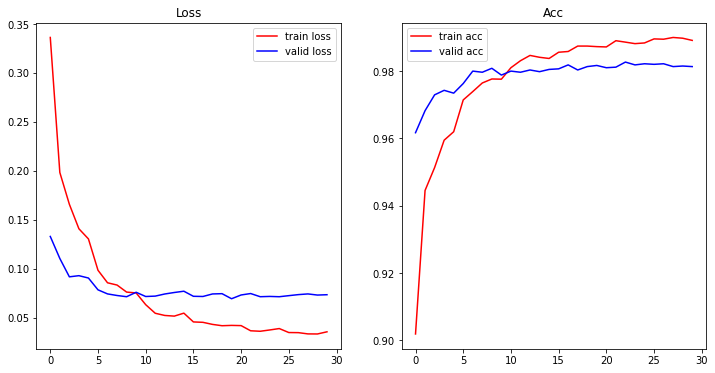

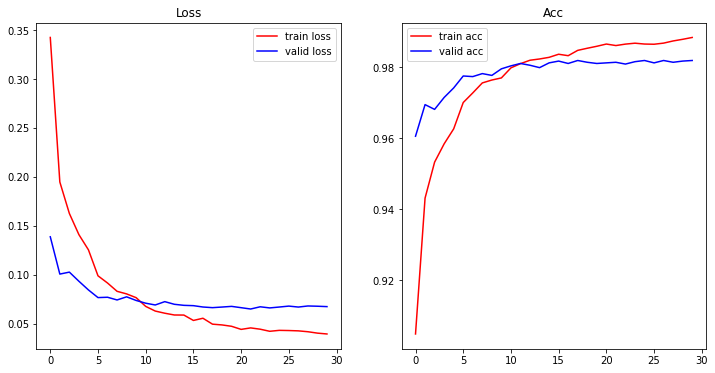

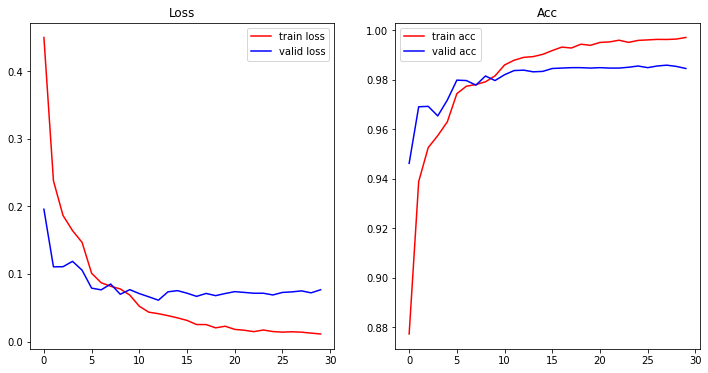

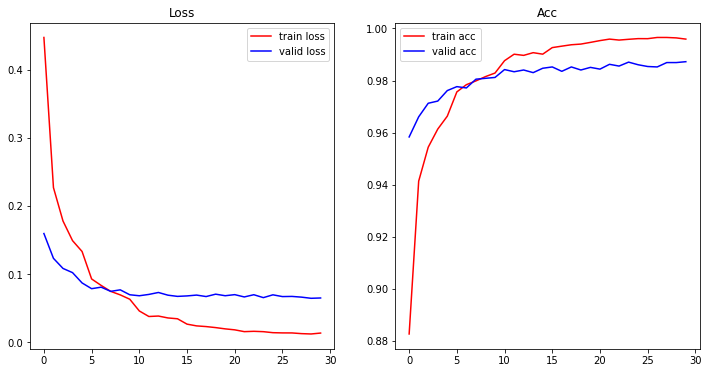

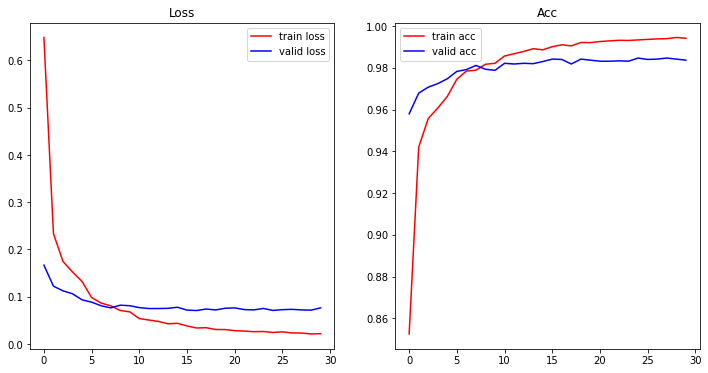

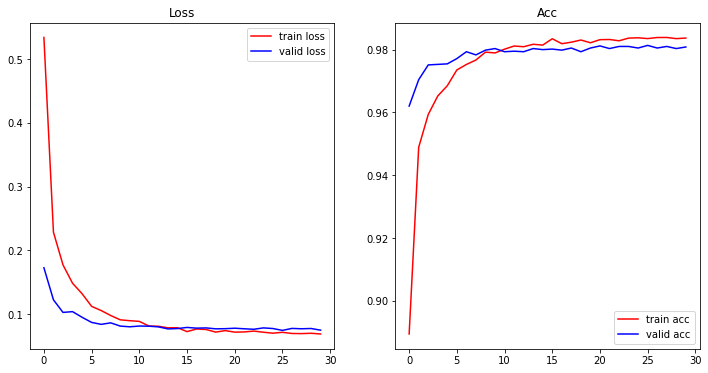

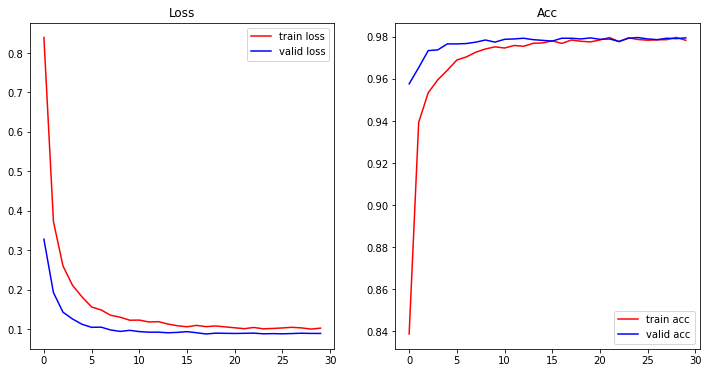

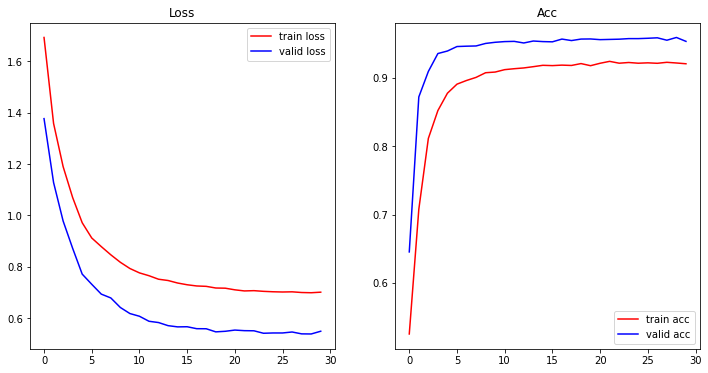

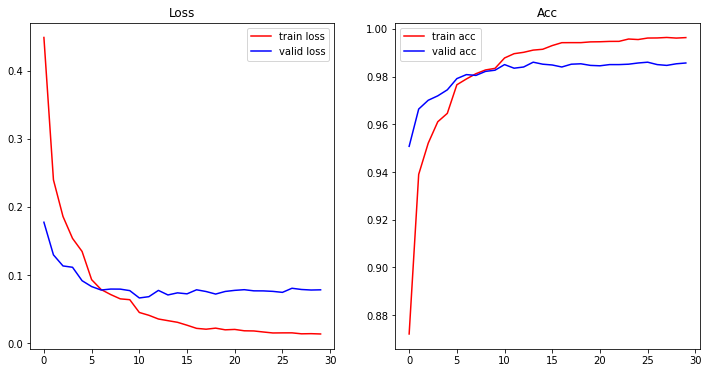

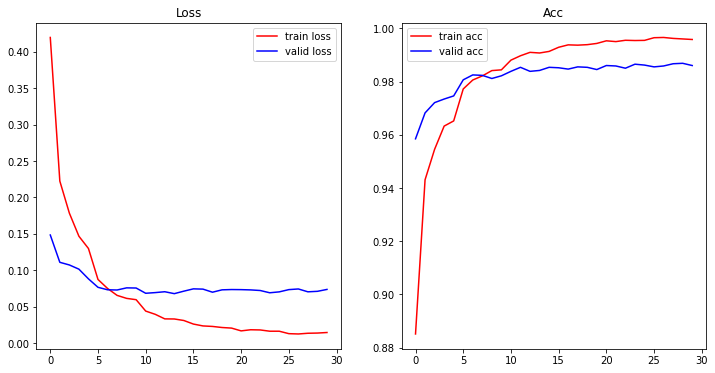

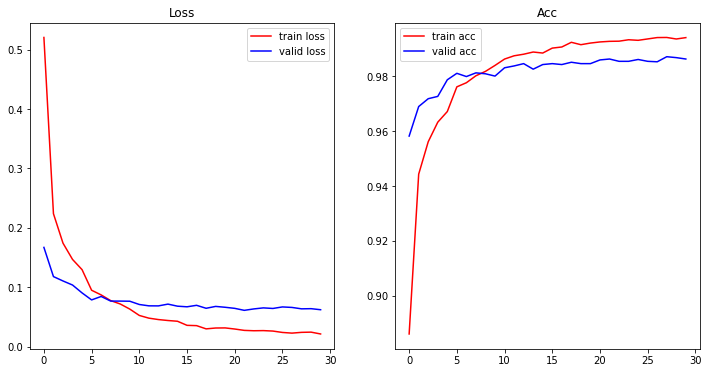

In [ ]:
for m in tqdm(model):
  for o in opti:
    for l in lr:
      print(f"Start training with model {m} with {o} optimizer, learning rate starting from {l}")
      trainer = Trainer(model_class=m, loaders=loaders['mnist'], n_class=data['mnist'], opt=o, lr=l, has_scheduler=True, device=device).to(device)
      trainer.train(max_epochs=30)
      trainer.test()

## FMNIST

  0%|          | 0/3 [00:00<?, ?it/s]

Start training with model <class '__main__.mymodel1'> with adam optimizer, learning rate starting from 0.01
===== Train Start =====
Epoch: 0, train loss: 0.492672, train acc: 0.823528, valid loss: 0.446709, valid acc: 0.831485
Epoch: 10, train loss: 0.162390, train acc: 0.937166, valid loss: 0.307629, valid acc: 0.893817
Epoch: 20, train loss: 0.076317, train acc: 0.971308, valid loss: 0.388861, valid acc: 0.896169
Epoch: 30, train loss: 0.053982, train acc: 0.980464, valid loss: 0.455311, valid acc: 0.894825
===== Test Start =====
Test loss: 0.476706, Test acc: 0.898037 

Start training with model <class '__main__.mymodel1'> with adam optimizer, learning rate starting from 0.005
===== Train Start =====
Epoch: 0, train loss: 0.477149, train acc: 0.828440, valid loss: 0.410005, valid acc: 0.844926
Epoch: 10, train loss: 0.152866, train acc: 0.942189, valid loss: 0.309850, valid acc: 0.894321
Epoch: 20, train loss: 0.070395, train acc: 0.974199, valid loss: 0.395424, valid acc: 0.897009


 33%|███▎      | 1/3 [39:00<1:18:00, 2340.27s/it]

Test loss: 0.414862, Test acc: 0.900942 

Start training with model <class '__main__.mymodel2'> with adam optimizer, learning rate starting from 0.01
===== Train Start =====
Epoch: 0, train loss: 0.608999, train acc: 0.786366, valid loss: 0.441107, valid acc: 0.838038
Epoch: 10, train loss: 0.282507, train acc: 0.898224, valid loss: 0.296241, valid acc: 0.890961
Epoch: 20, train loss: 0.223109, train acc: 0.918724, valid loss: 0.287302, valid acc: 0.898353
Epoch: 30, train loss: 0.207128, train acc: 0.923284, valid loss: 0.286277, valid acc: 0.899866
===== Test Start =====
Test loss: 0.303251, Test acc: 0.900040 

Start training with model <class '__main__.mymodel2'> with adam optimizer, learning rate starting from 0.005
===== Train Start =====
Epoch: 0, train loss: 0.594529, train acc: 0.793724, valid loss: 0.445325, valid acc: 0.838038
Epoch: 10, train loss: 0.272718, train acc: 0.902599, valid loss: 0.299130, valid acc: 0.890289
Epoch: 20, train loss: 0.217637, train acc: 0.921097, 

 67%|██████▋   | 2/3 [1:16:50<38:19, 2299.18s/it]

Test loss: 0.294373, Test acc: 0.897035 

Start training with model <class '__main__.mymodel3'> with adam optimizer, learning rate starting from 0.01
===== Train Start =====
Epoch: 0, train loss: 0.694082, train acc: 0.759935, valid loss: 0.452023, valid acc: 0.837198
Epoch: 10, train loss: 0.284339, train acc: 0.901394, valid loss: 0.297672, valid acc: 0.893481
Epoch: 20, train loss: 0.201570, train acc: 0.928807, valid loss: 0.292203, valid acc: 0.899866
Epoch: 30, train loss: 0.175791, train acc: 0.938278, valid loss: 0.290102, valid acc: 0.900874
===== Test Start =====
Test loss: 0.301815, Test acc: 0.901442 

Start training with model <class '__main__.mymodel3'> with adam optimizer, learning rate starting from 0.005
===== Train Start =====
Epoch: 0, train loss: 0.719904, train acc: 0.755857, valid loss: 0.465143, valid acc: 0.838206
Epoch: 10, train loss: 0.271654, train acc: 0.905472, valid loss: 0.295331, valid acc: 0.893481
Epoch: 20, train loss: 0.197030, train acc: 0.931606, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


===== Test Start =====
Test loss: 0.300801, Test acc: 0.900441 

Start training with model <class '__main__.mymodel3'> with adagrad optimizer, learning rate starting from 0.01
===== Train Start =====
Epoch: 0, train loss: 0.774078, train acc: 0.763475, valid loss: 0.503620, valid acc: 0.831653
Epoch: 10, train loss: 0.326282, train acc: 0.894313, valid loss: 0.333210, valid acc: 0.886929
Epoch: 20, train loss: 0.304042, train acc: 0.901857, valid loss: 0.323959, valid acc: 0.890793
Epoch: 30, train loss: 0.297994, train acc: 0.903470, valid loss: 0.321755, valid acc: 0.889785
===== Test Start =====
Test loss: 0.323765, Test acc: 0.892027 

Start training with model <class '__main__.mymodel3'> with adagrad optimizer, learning rate starting from 0.005
===== Train Start =====
Epoch: 0, train loss: 1.013243, train acc: 0.768424, valid loss: 0.584435, valid acc: 0.842238
Epoch: 10, train loss: 0.358595, train acc: 0.892349, valid loss: 0.339323, valid acc: 0.889953
Epoch: 20, train loss: 0.

100%|██████████| 3/3 [2:24:21<00:00, 2887.12s/it]

Test loss: 0.302122, Test acc: 0.899840 



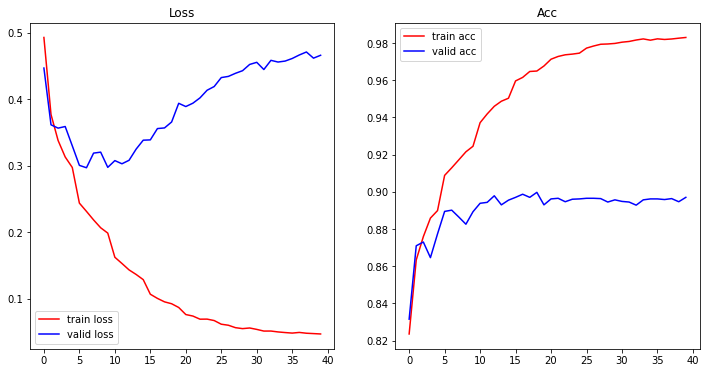

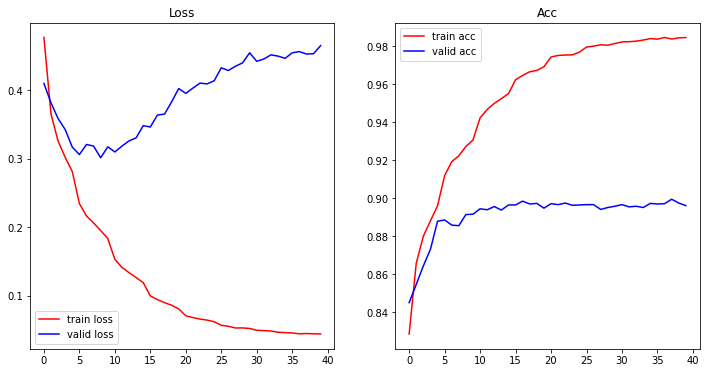

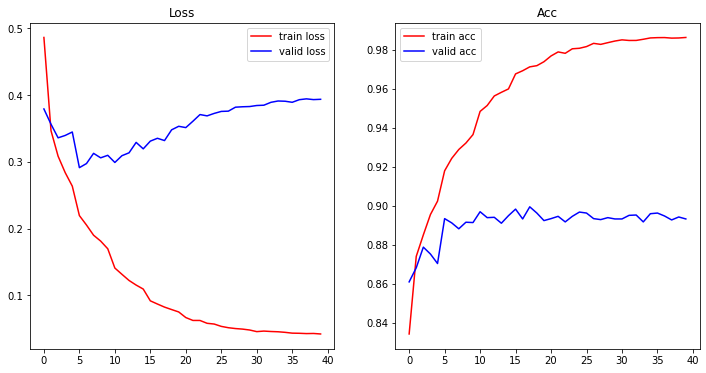

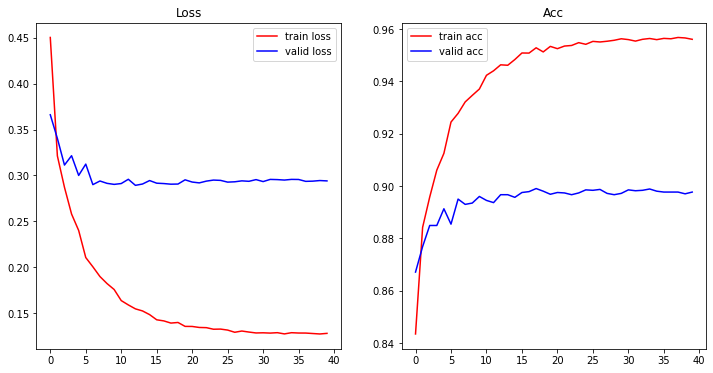

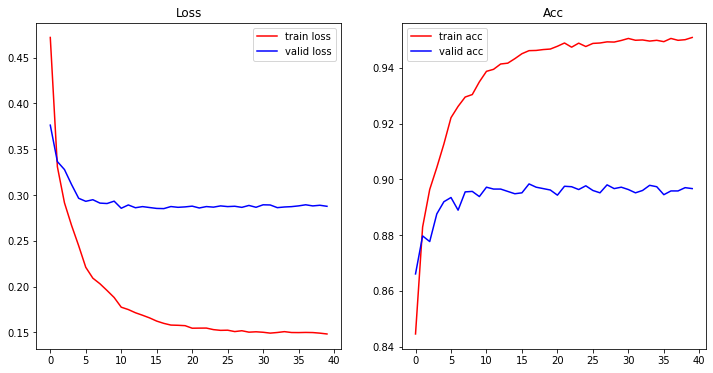

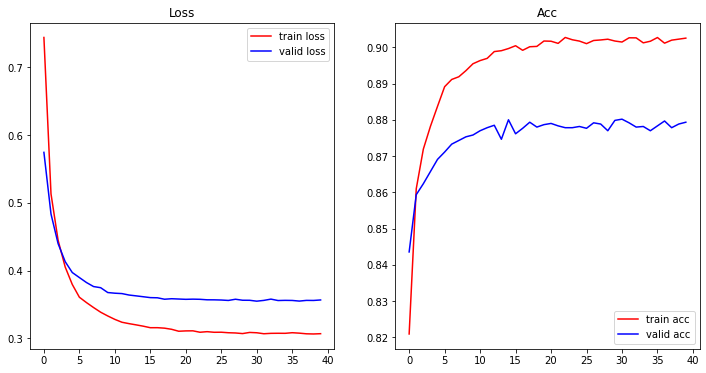

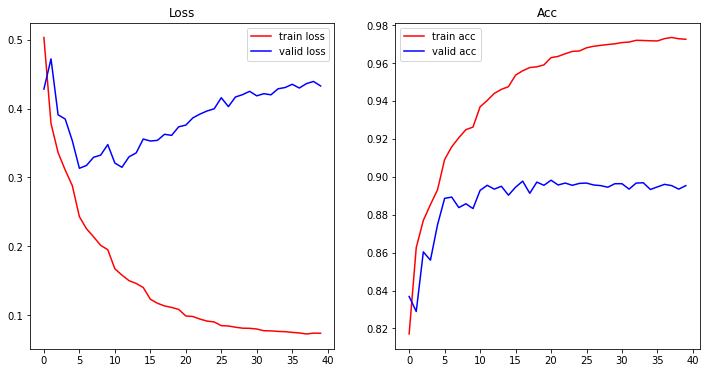

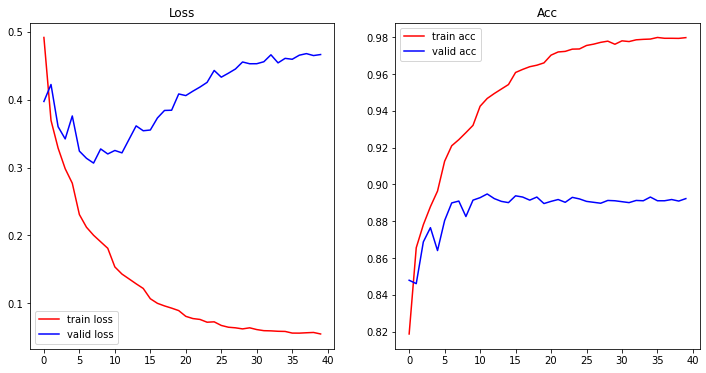

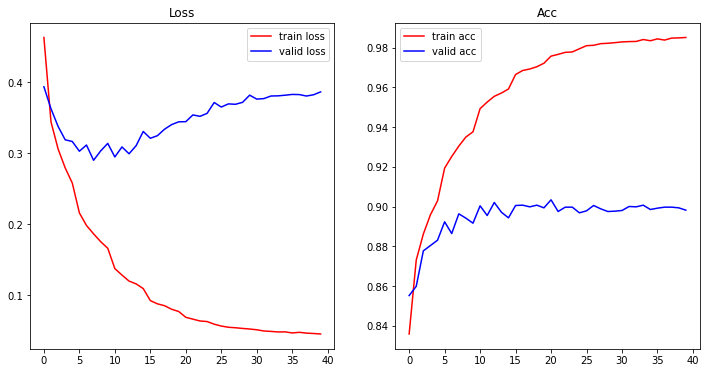

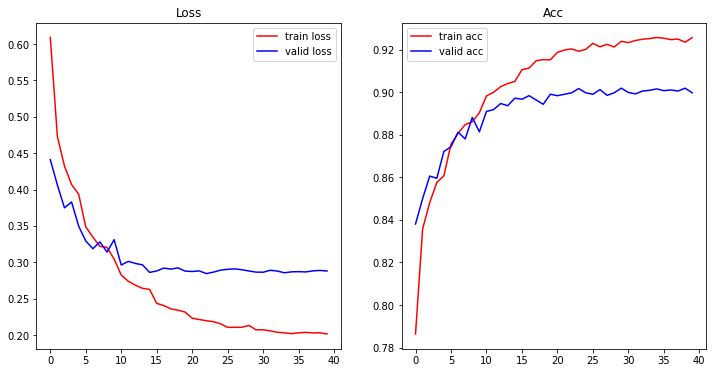

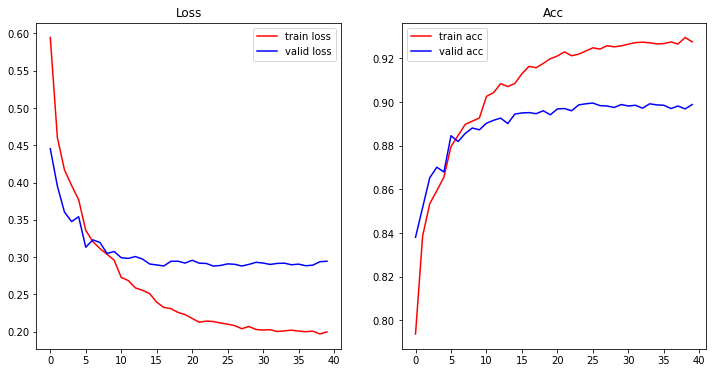

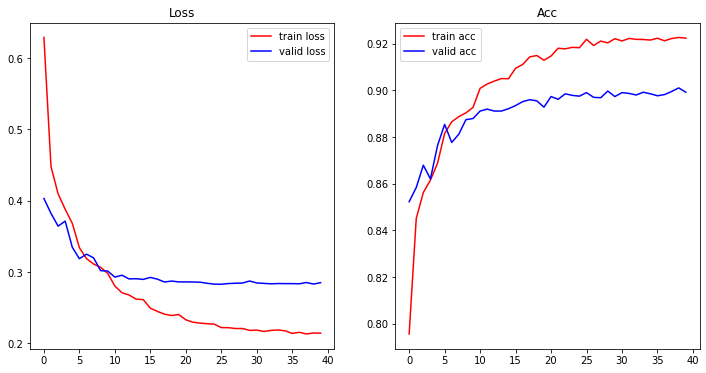

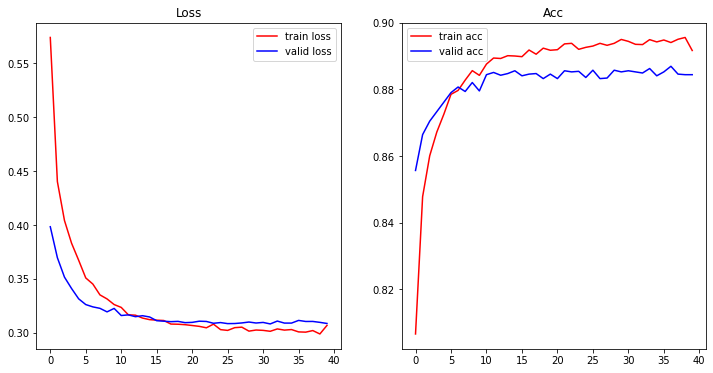

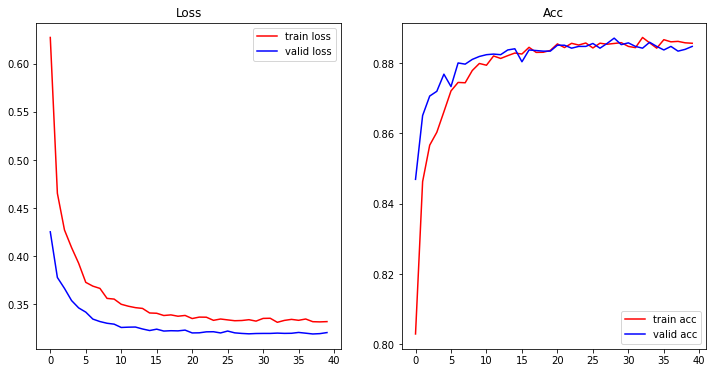

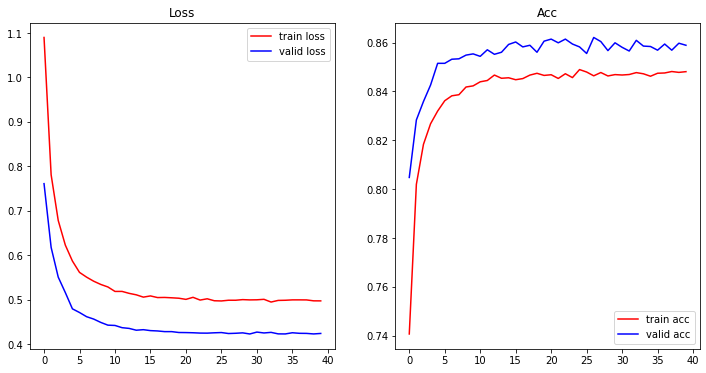

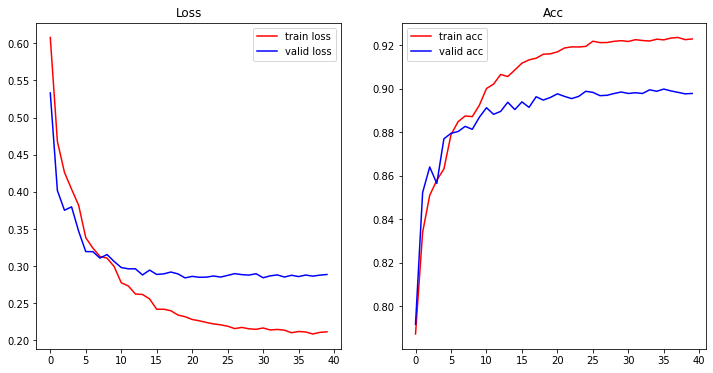

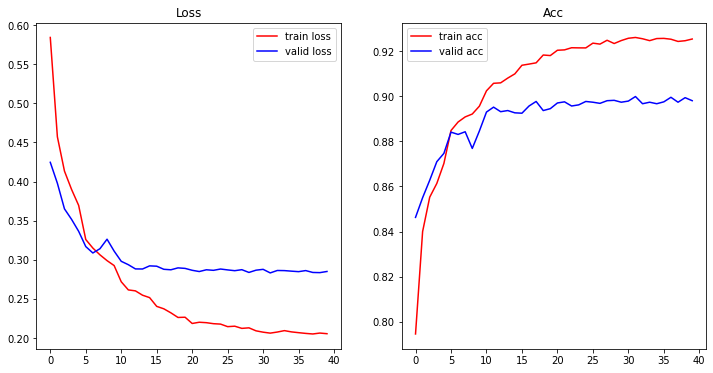

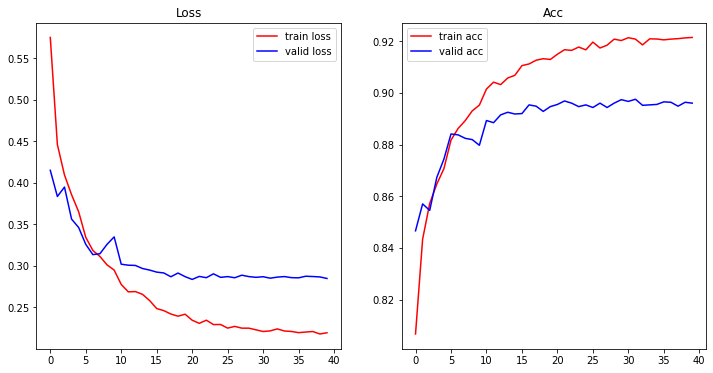

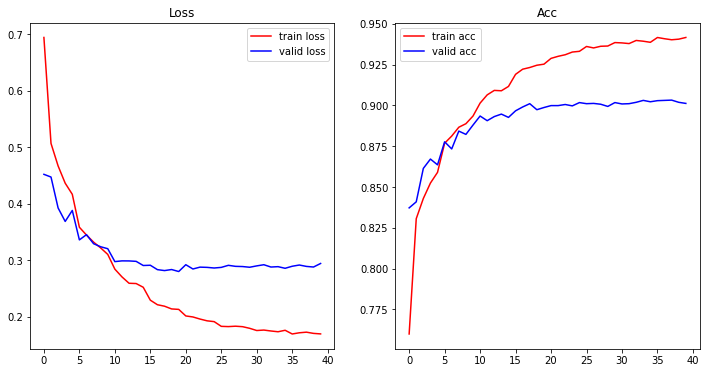

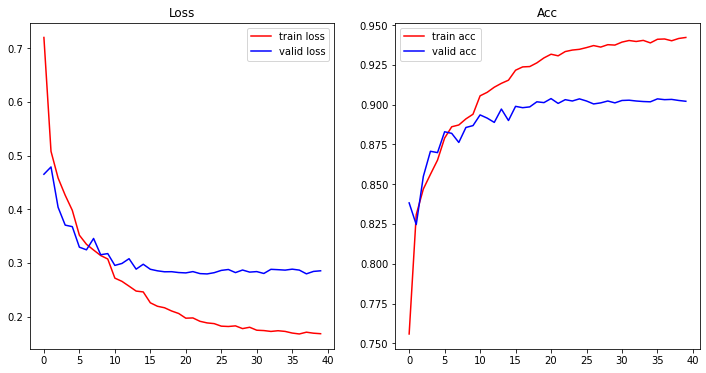

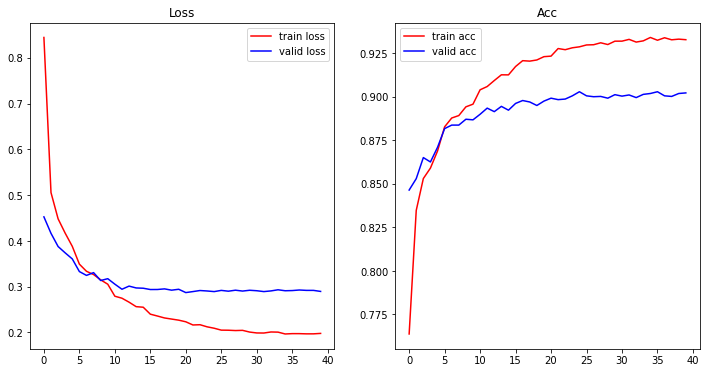

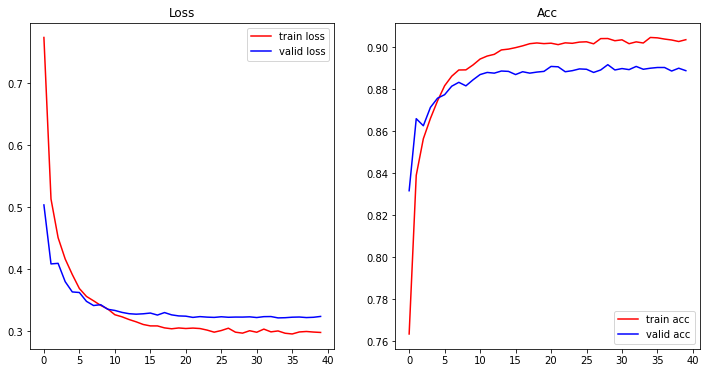

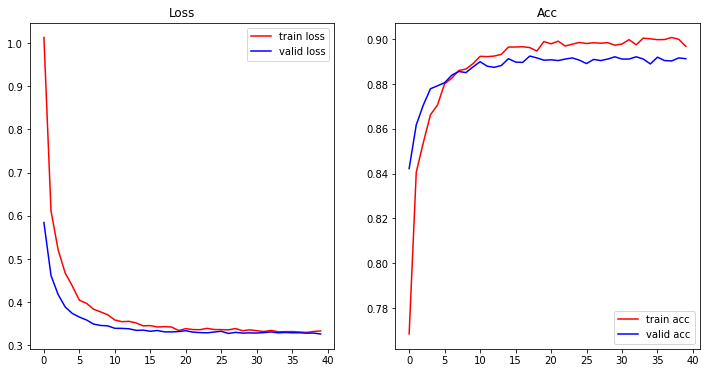

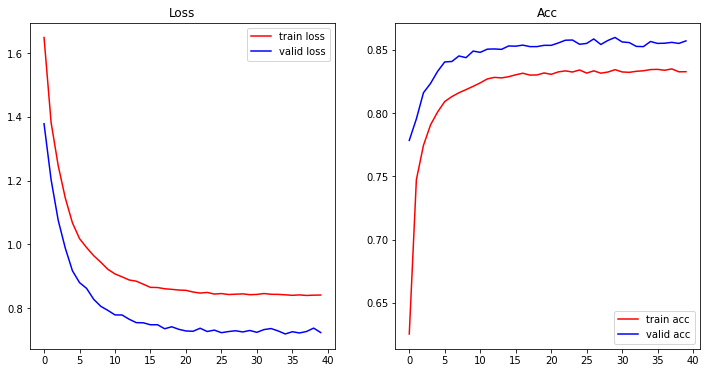

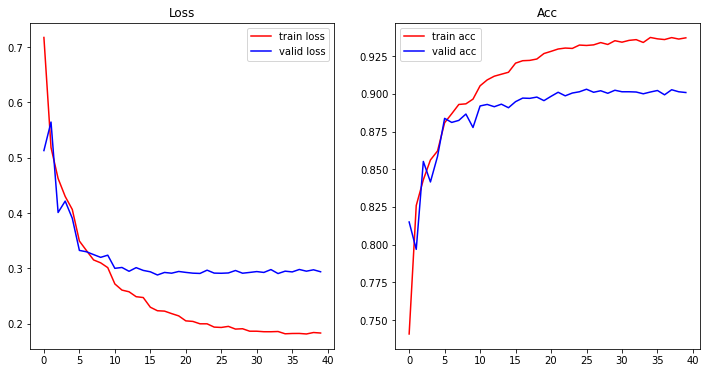

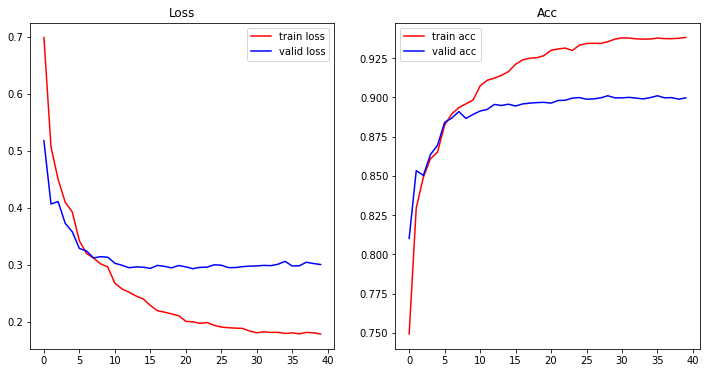

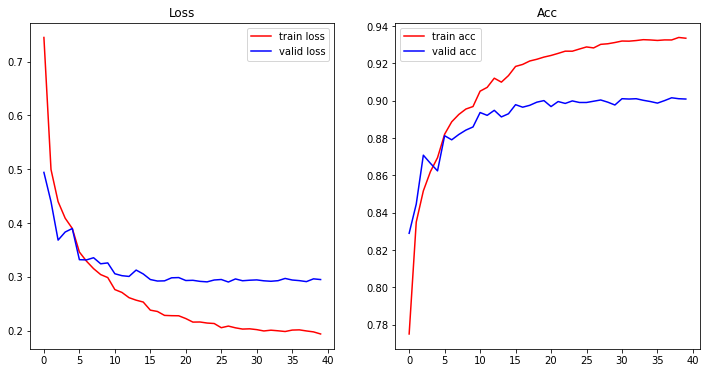

In [ ]:
for m in tqdm(model):
  for o in opti:
    for l in lr:
      print(f"Start training with model {m} with {o} optimizer, learning rate starting from {l}")
      trainer = Trainer(model_class=m, loaders=loaders['fmnist'], n_class=data['fmnist'], opt=o, lr=l, has_scheduler=True, device=device).to(device)
      trainer.train(max_epochs=40)
      trainer.test()

# 가장 성능이 좋은 최종 모델
- MNIST : Model3, Adam optimizer, lr=0.005, scheduler 적용
- FMNIST : Model3, Adam optimizer, lr=0.005, scheduler 적용



## 아쉬운 점
- 더 다양한 비율의 dropout을 진행해보고싶다. <br>

- 모든 learning rate에 대해 scheduler을 적용했는데, 0.001의 경우에는 시작 lr이 너무 작아서 학습에는 오히려 도움이 안된 것 같다.